In [1]:
import numpy as np, pandas as pd , random 
np.random.seed(0)
random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error as mae

In [2]:
path = "/storage/emulated/0/tanzania/"
train = pd.read_csv(path+"Train.csv")
test = pd.read_csv(path+"Test.csv")

In [3]:
train.shape, test.shape

((4809, 23), (1601, 22))

In [4]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
train.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [6]:
test.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,4806.0,9.267582e-01,1.288242e+00,0.0,0.0,1.0,1.0,49.0
total_male,4804.0,1.009575e+00,1.138865e+00,0.0,1.0,1.0,1.0,44.0
night_mainland,4809.0,8.488043e+00,1.042762e+01,0.0,3.0,6.0,11.0,145.0
night_zanzibar,4809.0,2.304429e+00,4.227080e+00,0.0,0.0,0.0,4.0,61.0
total_cost,4809.0,8.114389e+06,1.222490e+07,49000.0,812175.0,3397875.0,9945000.0,99532875.0


<AxesSubplot:>

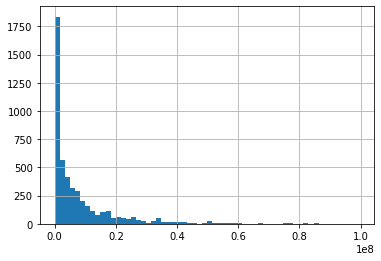

In [8]:
train.total_cost.hist(bins = 60)

<AxesSubplot:xlabel='travel_with', ylabel='count'>

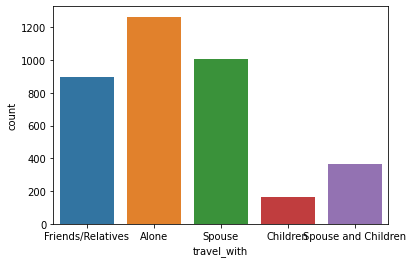

In [9]:
sns.countplot(x = "travel_with", data = train)

In [10]:
train.travel_with.fillna("Unknown", inplace = True)
test.travel_with.fillna("Unknown", inplace = True)

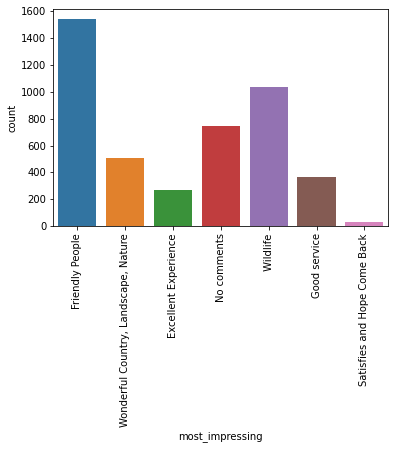

In [11]:
sns.countplot(data= train, x = "most_impressing")
plt.xticks(rotation=90)
plt.show()

In [12]:
train.most_impressing.fillna("No comments", inplace = True)
test.most_impressing.fillna("No comments", inplace = True)

In [13]:
train.total_male.value_counts()

1.0     2961
0.0     1137
2.0      478
3.0      139
4.0       46
6.0       17
5.0       15
15.0       2
7.0        2
10.0       2
9.0        2
17.0       1
12.0       1
44.0       1
Name: total_male, dtype: int64

In [14]:
train.total_female.value_counts()

1.0     2418
0.0     1669
2.0      463
3.0      144
4.0       46
5.0       25
6.0       15
7.0       10
10.0       4
9.0        4
12.0       3
11.0       3
15.0       1
49.0       1
Name: total_female, dtype: int64

In [15]:
train.total_male.fillna(1.0, inplace = True)
test.total_male.fillna(1.0, inplace = True)
train.total_female.fillna(1.0, inplace = True)
test.total_female.fillna(1.0, inplace = True)

<AxesSubplot:xlabel='age_group', ylabel='count'>

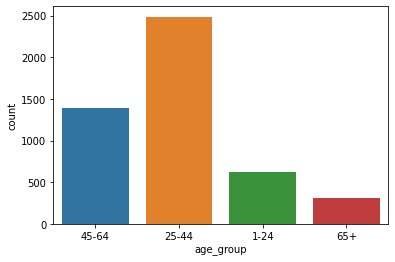

In [16]:
sns.countplot(data = train, x = "age_group")

In [17]:
cut_idx = train.shape[0]
cat_cols = train.select_dtypes(exclude="number").columns.values.tolist()
merged = pd.concat([train, test], ignore_index = False)

cat_cols.remove("ID")

for x in cat_cols:
    merged[x] = merged[x].astype("category")
    merged[x] = merged[x].cat.codes
    


In [18]:
train, test = merged.iloc[:cut_idx], merged[cut_idx:]

In [19]:
X = train.drop(columns = ["ID","total_cost"])
y = train.total_cost

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [21]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
preds = model.predict(X_test)

In [23]:
mae(y_test,preds)

5453632.173754395

## Make a Baseline Submission 

In [24]:
ss = pd.read_csv(path + "SampleSubmission.csv")

In [25]:
ss.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


In [26]:
test=test.drop(columns=["ID","total_cost"])
ss["total_cost"] = model.predict(test)

In [28]:
ss.to_csv("baseline.csv",index = False)

TODO: 
ADD TECHNIQUES SUCH AS 
* One Hot Encoding on Categorical Features 
* Normalization and ZScore Normalization on Numerical Features 
* Try to Find Better Creative Ways of Handling Missing Data.